## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [18]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [19]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [20]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [21]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [22]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()


optimizer = keras.optimizers.Adam(lr=0.001)


model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [23]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.9410 - acc: 0.3016 - val_loss: 1.8012 - val_acc: 0.3456
Epoch 2/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.7140 - acc: 0.3904 - val_loss: 1.6680 - val_acc: 0.4020
Epoch 3/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.6374 - acc: 0.4172 - val_loss: 1.5975 - val_acc: 0.4253
Epoch 4/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.5645 - acc: 0.4438 - val_loss: 1.5354 - val_acc: 0.4537
Epoch 5/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.5164 - acc: 0.4602 - val_loss: 1.4990 - val_acc: 0.4645
Epoch 6/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.4738 - acc: 0.4751 - val_loss: 1.5145 - val_acc: 0.4542
Epoch 7/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.4456 - acc: 0.4856 - val_loss: 1.4946 - 

50000/50000 [==============================] - 3s 55us/step - loss: 0.5352 - acc: 0.8103 - val_loss: 1.9735 - val_acc: 0.5204
Epoch 60/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.5186 - acc: 0.8131 - val_loss: 2.0057 - val_acc: 0.5187
Epoch 61/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.5141 - acc: 0.8170 - val_loss: 1.9951 - val_acc: 0.5213
Epoch 62/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.4966 - acc: 0.8208 - val_loss: 2.0632 - val_acc: 0.5226
Epoch 63/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.4977 - acc: 0.8205 - val_loss: 2.0435 - val_acc: 0.5212
Epoch 64/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.4766 - acc: 0.8290 - val_loss: 2.0659 - val_acc: 0.5175
Epoch 65/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.4608 - acc: 0.8352 - val_loss: 2.1963 - val_acc: 0.5160
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.2730 - acc: 0.9023 - val_loss: 3.4133 - val_acc: 0.5048
Epoch 119/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.2229 - acc: 0.9207 - val_loss: 3.3935 - val_acc: 0.5054
Epoch 120/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1870 - acc: 0.9339 - val_loss: 3.5048 - val_acc: 0.4985
Epoch 121/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2270 - acc: 0.9182 - val_loss: 3.4310 - val_acc: 0.5082
Epoch 122/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.2132 - acc: 0.9233 - val_loss: 3.4634 - val_acc: 0.5007
Epoch 123/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2092 - acc: 0.9257 - val_loss: 3.5867 - val_acc: 0.4976
Epoch 124/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.2275 - acc: 0.9192 - val_loss: 3.5635 - val_acc: 0.4934
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 56us/step - loss: 0.1437 - acc: 0.9496 - val_loss: 4.2230 - val_acc: 0.4924
Epoch 177/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.1447 - acc: 0.9481 - val_loss: 4.1790 - val_acc: 0.5001
Epoch 178/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1782 - acc: 0.9389 - val_loss: 4.0846 - val_acc: 0.4993
Epoch 179/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.1563 - acc: 0.9442 - val_loss: 4.1514 - val_acc: 0.5033
Epoch 180/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.1289 - acc: 0.9540 - val_loss: 4.1819 - val_acc: 0.4998
Epoch 181/500
50000/50000 [==============================] - 3s 57us/step - loss: 0.1360 - acc: 0.9517 - val_loss: 4.2436 - val_acc: 0.4992
Epoch 182/500
50000/50000 [==============================] - 3s 58us/step - loss: 0.2075 - acc: 0.9287 - val_loss: 4.2248 - val_acc: 0.4992
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 3s 55us/step - loss: 0.1722 - acc: 0.9416 - val_loss: 4.4681 - val_acc: 0.4981
Epoch 235/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1188 - acc: 0.9593 - val_loss: 4.4804 - val_acc: 0.4959
Epoch 236/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0762 - acc: 0.9735 - val_loss: 4.5169 - val_acc: 0.4995
Epoch 237/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0808 - acc: 0.9713 - val_loss: 4.5652 - val_acc: 0.5064
Epoch 238/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1349 - acc: 0.9542 - val_loss: 4.5886 - val_acc: 0.4888
Epoch 239/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1871 - acc: 0.9383 - val_loss: 4.6318 - val_acc: 0.4924
Epoch 240/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1597 - acc: 0.9465 - val_loss: 4.5705 - val_acc: 0.4952
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 3s 56us/step - loss: 0.0591 - acc: 0.9800 - val_loss: 4.8106 - val_acc: 0.5008
Epoch 293/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1274 - acc: 0.9582 - val_loss: 4.9256 - val_acc: 0.4896
Epoch 294/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.2057 - acc: 0.9363 - val_loss: 4.7094 - val_acc: 0.5011
Epoch 295/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1185 - acc: 0.9602 - val_loss: 4.8136 - val_acc: 0.4990
Epoch 296/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0805 - acc: 0.9730 - val_loss: 4.7195 - val_acc: 0.4997
Epoch 297/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0952 - acc: 0.9668 - val_loss: 4.8437 - val_acc: 0.4941
Epoch 298/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1204 - acc: 0.9601 - val_loss: 4.8608 - val_acc: 0.4850
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 3s 56us/step - loss: 0.0987 - acc: 0.9671 - val_loss: 4.9109 - val_acc: 0.4969
Epoch 351/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0879 - acc: 0.9704 - val_loss: 4.9368 - val_acc: 0.4975
Epoch 352/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1577 - acc: 0.9500 - val_loss: 4.9394 - val_acc: 0.4987
Epoch 353/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0634 - acc: 0.9783 - val_loss: 4.8889 - val_acc: 0.5055
Epoch 354/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0548 - acc: 0.9815 - val_loss: 4.9832 - val_acc: 0.4991
Epoch 355/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0631 - acc: 0.9783 - val_loss: 4.9314 - val_acc: 0.5017
Epoch 356/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1340 - acc: 0.9573 - val_loss: 5.0981 - val_acc: 0.4877
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 55us/step - loss: 0.0406 - acc: 0.9869 - val_loss: 5.1201 - val_acc: 0.4958
Epoch 409/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.2044 - acc: 0.9398 - val_loss: 5.0850 - val_acc: 0.4934
Epoch 410/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.1502 - acc: 0.9544 - val_loss: 5.0362 - val_acc: 0.4933
Epoch 411/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0794 - acc: 0.9739 - val_loss: 4.9830 - val_acc: 0.4970
Epoch 412/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0284 - acc: 0.9909 - val_loss: 5.0536 - val_acc: 0.5012
Epoch 413/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0315 - acc: 0.9893 - val_loss: 5.0668 - val_acc: 0.5038
Epoch 414/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0700 - acc: 0.9768 - val_loss: 5.1592 - val_acc: 0.4945
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 55us/step - loss: 0.0545 - acc: 0.9819 - val_loss: 5.1379 - val_acc: 0.4986
Epoch 467/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0466 - acc: 0.9846 - val_loss: 5.1608 - val_acc: 0.5046
Epoch 468/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0405 - acc: 0.9865 - val_loss: 5.1787 - val_acc: 0.4998
Epoch 469/500
50000/50000 [==============================] - 3s 56us/step - loss: 0.0547 - acc: 0.9817 - val_loss: 5.1213 - val_acc: 0.5010
Epoch 470/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1308 - acc: 0.9598 - val_loss: 5.2588 - val_acc: 0.4872
Epoch 471/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.1318 - acc: 0.9586 - val_loss: 5.2524 - val_acc: 0.4944
Epoch 472/500
50000/50000 [==============================] - 3s 55us/step - loss: 0.0757 - acc: 0.9755 - val_loss: 5.0995 - val_acc: 0.4987
Epoch 473/500
50000/50000 [=======

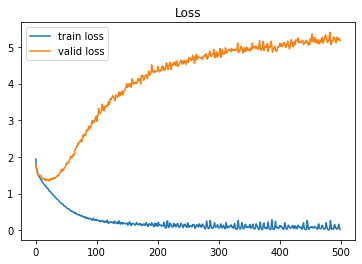

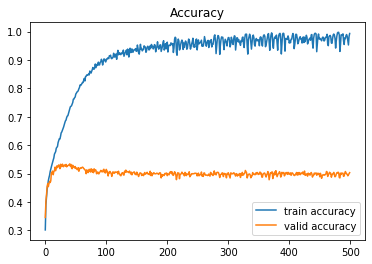

In [24]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [25]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()


optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)


model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [26]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 52us/step - loss: 2.0773 - acc: 0.2524 - val_loss: 1.9423 - val_acc: 0.3075
Epoch 2/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.8870 - acc: 0.3351 - val_loss: 1.8404 - val_acc: 0.3461
Epoch 3/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.8084 - acc: 0.3658 - val_loss: 1.7810 - val_acc: 0.3684
Epoch 4/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.7552 - acc: 0.3861 - val_loss: 1.7343 - val_acc: 0.3905
Epoch 5/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.7124 - acc: 0.4026 - val_loss: 1.6937 - val_acc: 0.4015
Epoch 6/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6778 - acc: 0.4116 - val_loss: 1.6612 - val_acc: 0.4155
Epoch 7/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.6478 - acc: 0.4226 - val_loss: 1.6433 - 

50000/50000 [==============================] - 2s 46us/step - loss: 1.0627 - acc: 0.6269 - val_loss: 1.3246 - val_acc: 0.5346
Epoch 60/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0562 - acc: 0.6277 - val_loss: 1.4429 - val_acc: 0.5001
Epoch 61/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0485 - acc: 0.6311 - val_loss: 1.3599 - val_acc: 0.5255
Epoch 62/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0406 - acc: 0.6352 - val_loss: 1.3775 - val_acc: 0.5143
Epoch 63/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0344 - acc: 0.6370 - val_loss: 1.3508 - val_acc: 0.5344
Epoch 64/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0255 - acc: 0.6403 - val_loss: 1.3378 - val_acc: 0.5319
Epoch 65/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0175 - acc: 0.6411 - val_loss: 1.4404 - val_acc: 0.5048
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6546 - acc: 0.7758 - val_loss: 1.4954 - val_acc: 0.5349
Epoch 119/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.6489 - acc: 0.7755 - val_loss: 1.5282 - val_acc: 0.5351
Epoch 120/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6464 - acc: 0.7794 - val_loss: 1.6049 - val_acc: 0.5103
Epoch 121/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6314 - acc: 0.7850 - val_loss: 1.6102 - val_acc: 0.5167
Epoch 122/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6361 - acc: 0.7838 - val_loss: 1.6637 - val_acc: 0.5107
Epoch 123/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6189 - acc: 0.7864 - val_loss: 1.5592 - val_acc: 0.5292
Epoch 124/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.6166 - acc: 0.7885 - val_loss: 1.8115 - val_acc: 0.4906
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 46us/step - loss: 0.3402 - acc: 0.8923 - val_loss: 1.9254 - val_acc: 0.5276
Epoch 177/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.3358 - acc: 0.8935 - val_loss: 2.2389 - val_acc: 0.4815
Epoch 178/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.3423 - acc: 0.8892 - val_loss: 2.0402 - val_acc: 0.5181
Epoch 179/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.3243 - acc: 0.8949 - val_loss: 2.1309 - val_acc: 0.5079
Epoch 180/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.3194 - acc: 0.8983 - val_loss: 1.9739 - val_acc: 0.5276
Epoch 181/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.3270 - acc: 0.8986 - val_loss: 2.1243 - val_acc: 0.5114
Epoch 182/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.3073 - acc: 0.9016 - val_loss: 2.0870 - val_acc: 0.5100
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 48us/step - loss: 0.2629 - acc: 0.9242 - val_loss: 2.6261 - val_acc: 0.5085
Epoch 235/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.1358 - acc: 0.9665 - val_loss: 2.9278 - val_acc: 0.4830
Epoch 236/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.2188 - acc: 0.9351 - val_loss: 2.5036 - val_acc: 0.5214
Epoch 237/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.1036 - acc: 0.9772 - val_loss: 2.5671 - val_acc: 0.5173
Epoch 238/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.1036 - acc: 0.9766 - val_loss: 2.5138 - val_acc: 0.5185
Epoch 239/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0914 - acc: 0.9814 - val_loss: 2.4790 - val_acc: 0.5247
Epoch 240/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0876 - acc: 0.9827 - val_loss: 2.5615 - val_acc: 0.5120
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 47us/step - loss: 0.0345 - acc: 0.9971 - val_loss: 2.8659 - val_acc: 0.5203
Epoch 293/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0328 - acc: 0.9974 - val_loss: 2.8809 - val_acc: 0.5165
Epoch 294/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0335 - acc: 0.9970 - val_loss: 2.8748 - val_acc: 0.5185
Epoch 295/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0302 - acc: 0.9980 - val_loss: 2.8843 - val_acc: 0.5157
Epoch 296/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0294 - acc: 0.9982 - val_loss: 3.0086 - val_acc: 0.5114
Epoch 297/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0307 - acc: 0.9976 - val_loss: 2.8861 - val_acc: 0.5177
Epoch 298/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0294 - acc: 0.9982 - val_loss: 2.9074 - val_acc: 0.5215
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 47us/step - loss: 0.0133 - acc: 0.9997 - val_loss: 3.1244 - val_acc: 0.5200
Epoch 351/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0130 - acc: 0.9997 - val_loss: 3.1565 - val_acc: 0.5180
Epoch 352/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0131 - acc: 0.9997 - val_loss: 3.1470 - val_acc: 0.5143
Epoch 353/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0124 - acc: 0.9998 - val_loss: 3.1428 - val_acc: 0.5153
Epoch 354/500
50000/50000 [==============================] - 2s 46us/step - loss: 0.0122 - acc: 0.9998 - val_loss: 3.1634 - val_acc: 0.5180
Epoch 355/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0121 - acc: 0.9997 - val_loss: 3.1635 - val_acc: 0.5177
Epoch 356/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0118 - acc: 0.9998 - val_loss: 3.1666 - val_acc: 0.5196
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 48us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 3.3745 - val_acc: 0.5148
Epoch 409/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0060 - acc: 1.0000 - val_loss: 3.3742 - val_acc: 0.5165
Epoch 410/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 3.3834 - val_acc: 0.5164
Epoch 411/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0059 - acc: 1.0000 - val_loss: 3.3886 - val_acc: 0.5159
Epoch 412/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 3.3789 - val_acc: 0.5163
Epoch 413/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0057 - acc: 1.0000 - val_loss: 3.3857 - val_acc: 0.5199
Epoch 414/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 3.3914 - val_acc: 0.5173
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 48us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 3.5298 - val_acc: 0.5150
Epoch 467/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 3.5351 - val_acc: 0.5165
Epoch 468/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 3.5276 - val_acc: 0.5158
Epoch 469/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.5456 - val_acc: 0.5137
Epoch 470/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.5367 - val_acc: 0.5173
Epoch 471/500
50000/50000 [==============================] - 2s 48us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.5332 - val_acc: 0.5173
Epoch 472/500
50000/50000 [==============================] - 2s 47us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.5386 - val_acc: 0.5168
Epoch 473/500
50000/50000 [=======

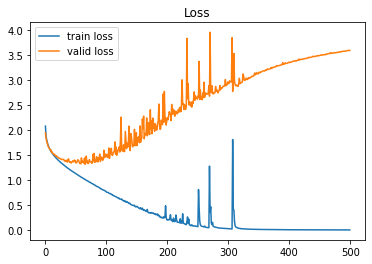

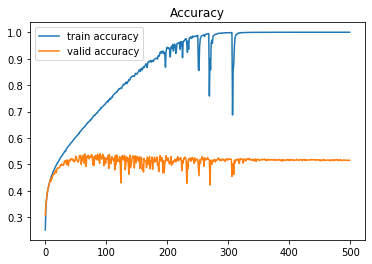

In [27]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()